<a href="https://colab.research.google.com/github/chathasphere/chathasphere.github.io/blob/main/teaching/306_materials/003_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5: Exploratory Data Analysis
## February 8th, 2022





# 1. Logistics

- I am shifting my office hours slightly (based on when people seem to attend).
- Remark(s) on Homework 2
- Questions on Homework 3?

In [19]:
library(tidyverse)
options(repr.plot.height=6)

## The EDA Mindset

Hadley Wichkam calls EDA an "iterative cycle." 

- Generate questions about your data (easiest way to come up with good questions is to come up with many questions)
- Search for answers by visualizing, transforming, and modeling your data (we already practiced some of this last lab(s))
- Refine questions or ask new ones based on these insights

I would also add: EDA is a great place for sanity checks, such as missing or duplicated entries. It's much more pleasant to catch these sorts of things early on in the data science process.

HW names two questions as particularly important:

1. What type of variation occurs *within* my variables?

2. What type of covariation occurs *between* my variables?

# 2. Variation

- Think: spread, distribution, changeability of a measured phenomenon

- Includes systemic variance and the "noise" of messy observations

- Best way to understand variation is to visualize it!

*  **Categorical Variable**: Try out bar charts first
*  **Continuous Variable**: Try out histograms first 


## 2.1 Visualizing Variation

In [11]:
head(storms)

name,year,month,day,hour,lat,long,status,category,wind,pressure,ts_diameter,hu_diameter
<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<ord>,<int>,<int>,<dbl>,<dbl>
Amy,1975,6,27,0,27.5,-79.0,tropical depression,-1,25,1013,NA,NA
Amy,1975,6,27,6,28.5,-79.0,tropical depression,-1,25,1013,NA,NA
Amy,1975,6,27,12,29.5,-79.0,tropical depression,-1,25,1013,NA,NA
Amy,1975,6,27,18,30.5,-79.0,tropical depression,-1,25,1013,NA,NA
Amy,1975,6,28,0,31.5,-78.8,tropical depression,-1,25,1012,NA,NA
Amy,1975,6,28,6,32.4,-78.7,tropical depression,-1,25,1012,NA,NA


### Discrete Example (category)

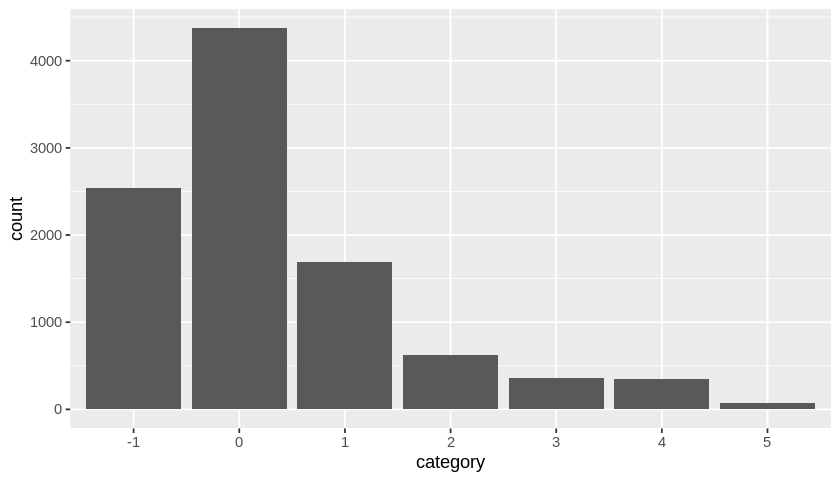

In [12]:
storms %>%
  mutate(category = factor(category)) %>%
  ggplot() +
    geom_bar(aes(x=category))

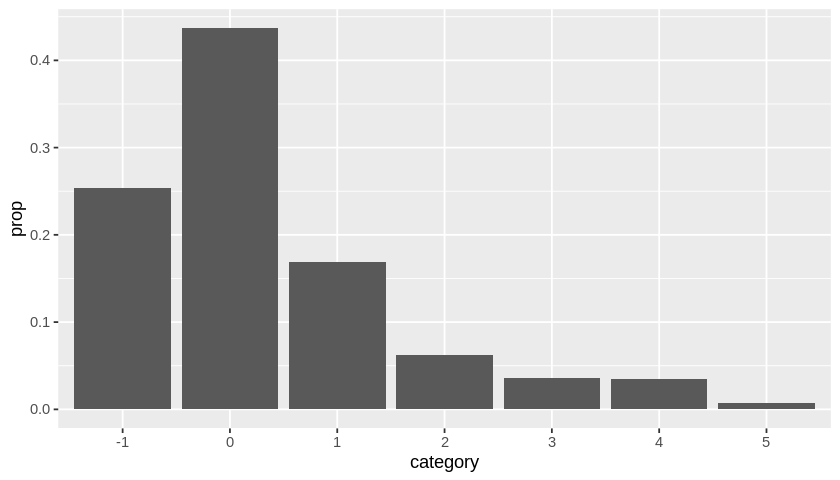

In [17]:
# recall: how would we turn this into a proportion bar plot?

storms %>%
  mutate(category = factor(category)) %>%
  ggplot() +
    geom_bar(aes(y = ..prop.., x=category, group=1))

### Continuous Example (pressure)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



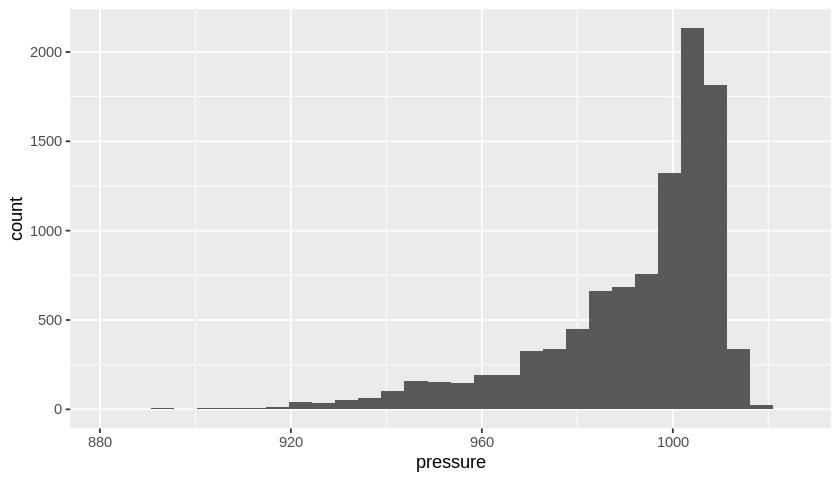

In [16]:
ggplot(storms, aes(x=pressure)) + 
  geom_histogram()
# need to play around with binwidth...

## 2.2 Typical Values

Things to look for:

* Which values are the most common? Why?
* Which values are rare? Why? Is that expected?
* Are there any weird patterns? Can we explain why?


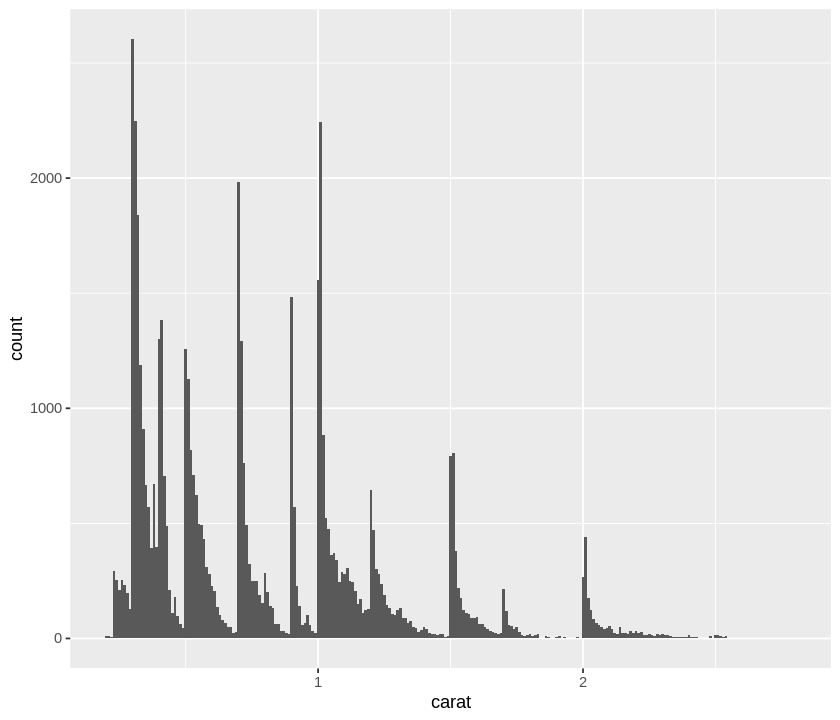

In [20]:
smaller <- diamonds %>% 
  filter(carat < 3)

ggplot(data = smaller, mapping = aes(x = carat)) +
  geom_histogram(binwidth = 0.01)

What stands out to you about the above graph?

## 2.3 Outliers

Sometimes outliers are just measurement errors. Sometimes not. 

Depending on the situation, you'll want to keep or discard outliers. But it's always helpful to have a sense of where they are.

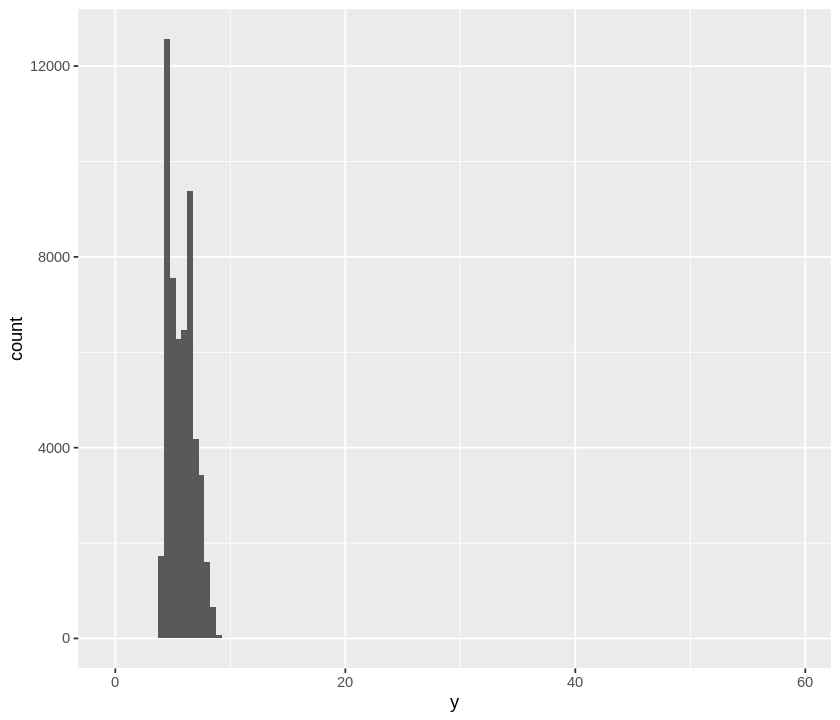

In [22]:
# can you see the outliers here?
ggplot(diamonds) + 
  geom_histogram(mapping = aes(x = y), binwidth = 0.5)

Pro Tip: use `coord_cartesian()` to help zoom in (on miniscule details)

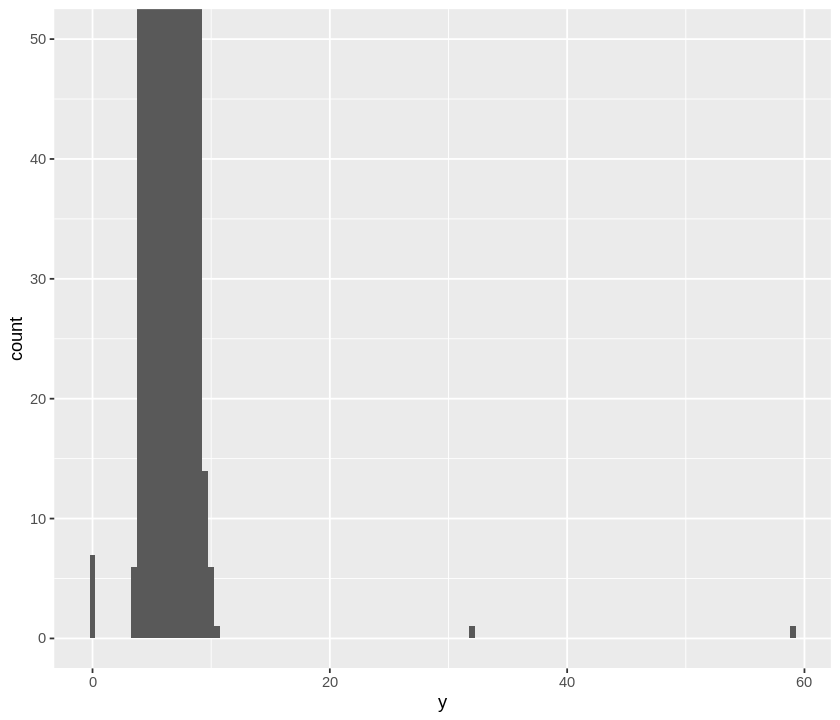

In [23]:
# how about now?
ggplot(diamonds) + 
  geom_histogram(mapping = aes(x = y), binwidth = 0.5) +
  coord_cartesian(ylim = c(0, 50))

**Exercise:**

Explore the distribution of at least two variables in the `storms` data frame. What questions come to mind?

In [24]:
head(storms)

name,year,month,day,hour,lat,long,status,category,wind,pressure,ts_diameter,hu_diameter
<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<ord>,<int>,<int>,<dbl>,<dbl>
Amy,1975,6,27,0,27.5,-79.0,tropical depression,-1,25,1013,NA,NA
Amy,1975,6,27,6,28.5,-79.0,tropical depression,-1,25,1013,NA,NA
Amy,1975,6,27,12,29.5,-79.0,tropical depression,-1,25,1013,NA,NA
Amy,1975,6,27,18,30.5,-79.0,tropical depression,-1,25,1013,NA,NA
Amy,1975,6,28,0,31.5,-78.8,tropical depression,-1,25,1012,NA,NA
Amy,1975,6,28,6,32.4,-78.7,tropical depression,-1,25,1012,NA,NA


## 2.4 Missing Values

`ggplot` and R generally believe that missing values should never silently go missing, so it warns you when missing values have been removed. If you don't want that warning, set na.rm = TRUE;




Warning message:
“Removed 9 rows containing non-finite values (stat_bin).”


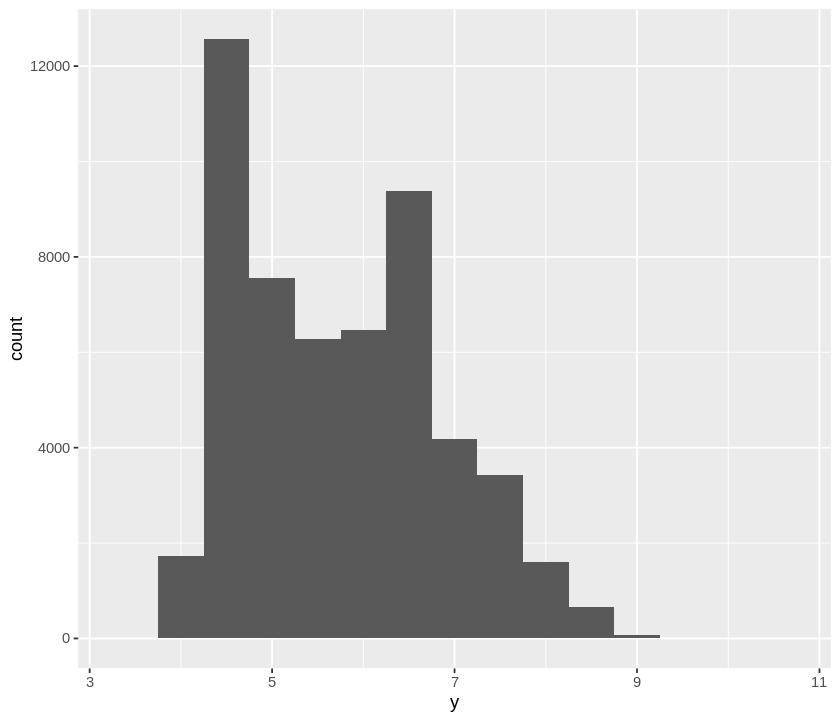

In [26]:
diamonds2 <- diamonds %>% 
  # replace unusual values of "y" with na 
  mutate(y = ifelse(y < 3 | y > 20, NA, y))

  ggplot(diamonds2) + 
  geom_histogram(mapping = aes(x = y), binwidth = 0.5)

# the statistical field of "imputation" is all about strategies for 
# handling missing data. 

Occasionally, missing values have a deeper significance. Consider a airplane flights data set where missing "departure time" values indicate that the flight was cancelled.

**Exercises**

What happens to missing values in a histogram vs. barchart? Why is there a difference?

In [31]:
# head(starwars)

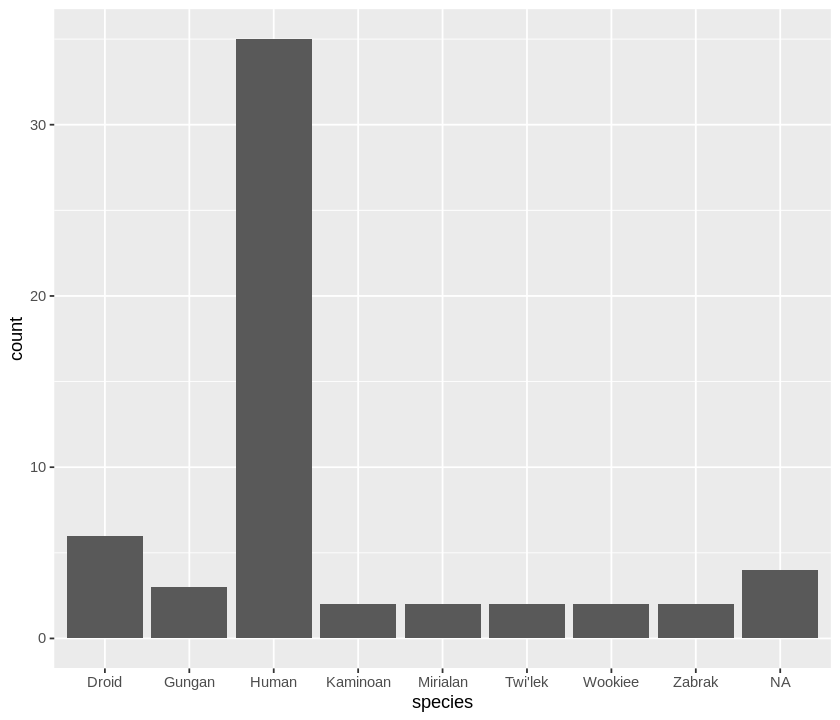

In [29]:
starwars %>%
  group_by(species) %>%
  filter(n() > 1) %>%
  ggplot() +
    geom_bar(mapping = aes(x = species))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 6 rows containing non-finite values (stat_bin).”


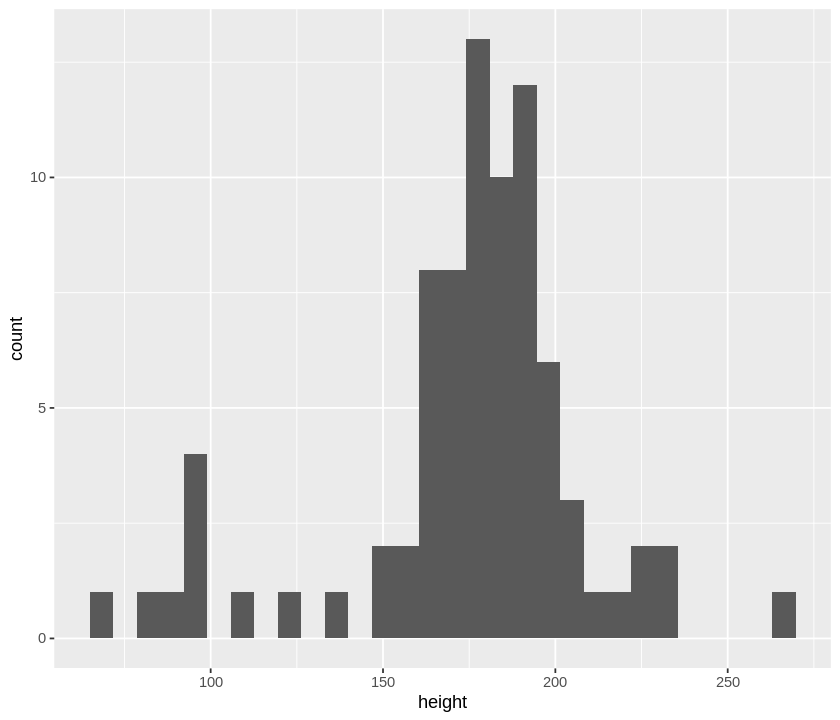

In [30]:
ggplot(starwars, aes(x = height)) + geom_histogram()

# 3. Covariation

- Think: relationships, associations, correlations between variables
- Or lack thereof
- Here as well, how we visulize covariation depends on what kind of variables we have.

## 3.1 A Categorical and Continuous variable

We want to see the distribution of a continuous variable broken down by categories.

We can use `freqpoly()` - to plot histogram-like distributions with each factor being a different line. 

Works best when there are relatively few levels with comparable counts.

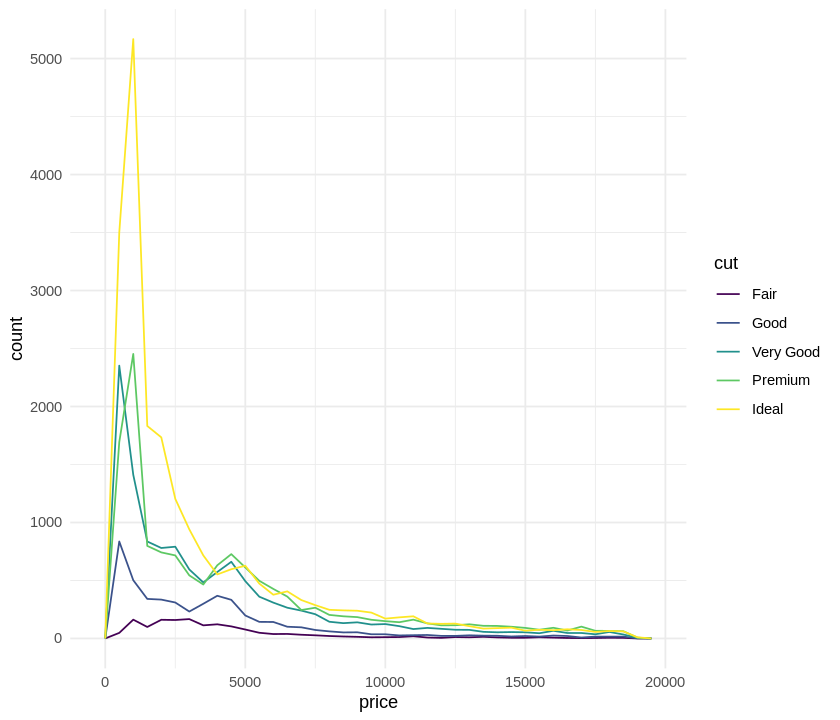

In [34]:
ggplot(data = diamonds, mapping = aes(x = price)) + 
  geom_freqpoly(mapping = aes(colour = cut), binwidth = 500) + 
  theme_minimal()

# recall: a geom_col plot can only give us one statistic per bar, 
# not the whole distribution

We can plot densities (which normalizes the heights of each level's distribution) with `freq_poly` as well. This can make comparison easier, but also suppresses difference in scale

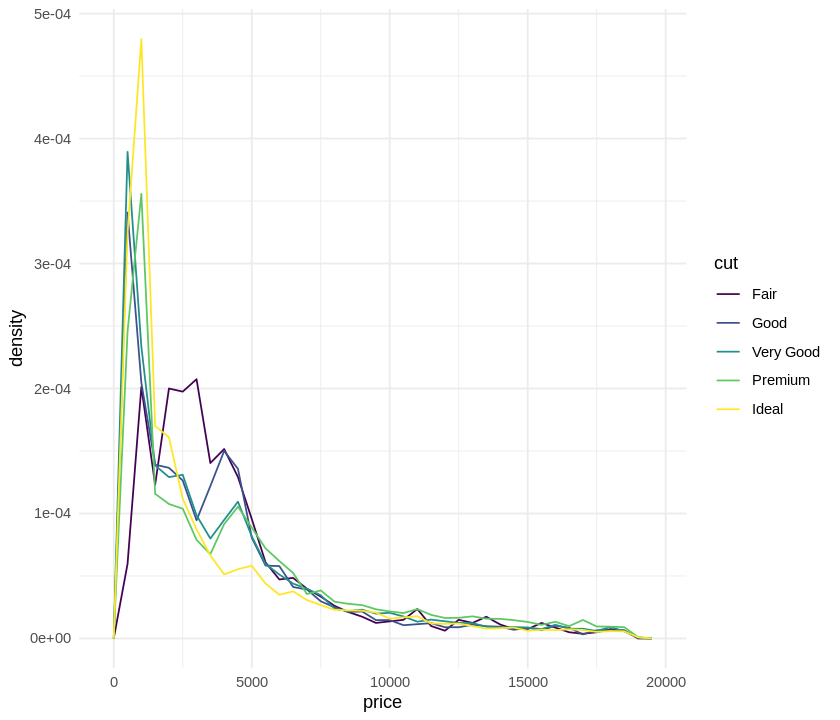

In [36]:
ggplot(data = diamonds, mapping = aes(x = price, y = ..density..)) + 
  geom_freqpoly(mapping = aes(colour = cut), binwidth = 500) + 
  theme_minimal()

`geom_boxplot` gives a condensed summary of the distributions for each level.

From a boxplot you can find the: 
- minimum, 
- first quartile
- median 
- third quartile
- max values 
- any outliers (as the code determines).

These have the advantage of being simple nand easy to compare at a glance.

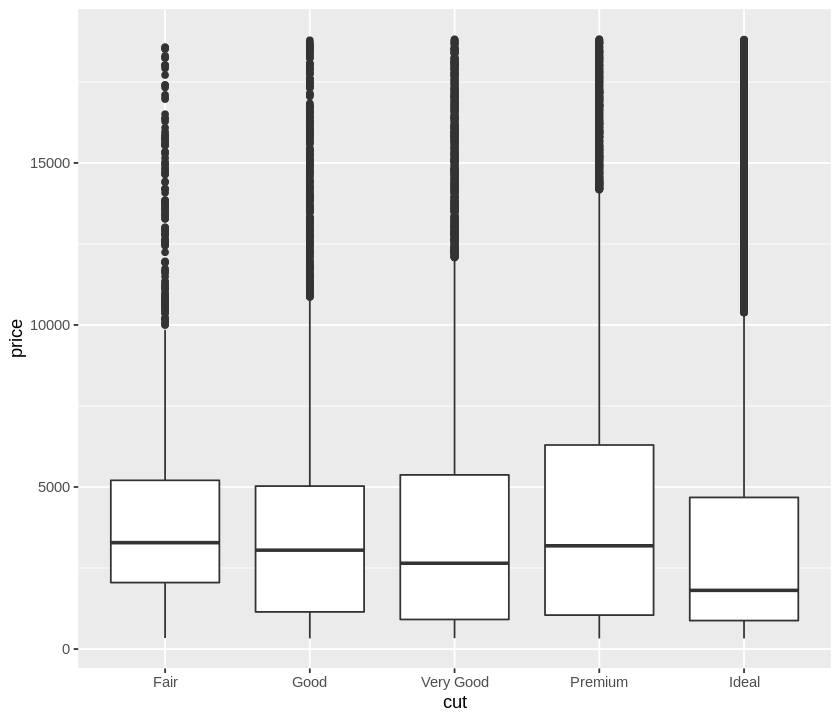

In [38]:
ggplot(data = diamonds, mapping = aes(x = cut, y = price)) +
  geom_boxplot()

# note that there appear to be many upper outliers in price...
# for a luxury good like diamonds, would a log scaling be more appropriate?
# sounds like an EDA question...

**Exercise**



Boxplots were developed before the era of large data, and so they struggle with variables that have many outliers. What does `geom_lv()` (a letter value plotter) do instead? What about `geom_violin()`?

An internt search will be of help here.


In [39]:
# you may need to uncomment the following line to install this package
# install.packages('lvplot')
ggplot(data = diamonds, mapping = aes(x = cut, y = price)) +
  lvplot::geom_lv()

?lvplot::geom_lv

ggplot(data = diamonds, mapping = aes(x = cut, y = price)) +
  geom_violin()

ERROR: ignored

## 3.2 Two Categorical Variables

The only way to really compare two categorical variables is count how many observations fall in each intersection

*  `geom_count()`:the size of each circle corresponds to the number in the overlap. 
* Potential downside: might imply an ordering where none exists

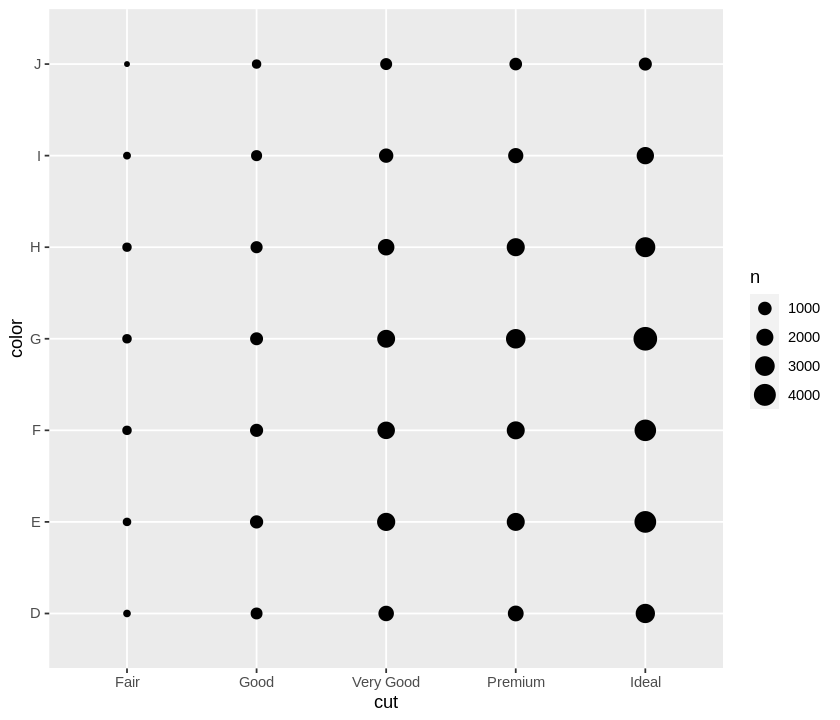

In [40]:
ggplot(data = diamonds) +
  geom_count(mapping = aes(x = cut, y = color))

* Alternatively, compute the pairwise counts with `dplyr`. 
* Potential downside: lengthy outputs or hard to see trends

In [41]:
diamonds %>% 
  count(color, cut)

color,cut,n
<ord>,<ord>,<int>
D,Fair,163
D,Good,662
D,Very Good,1513
D,Premium,1603
D,Ideal,2834
E,Fair,224
E,Good,933
E,Very Good,2400
E,Premium,2337


*  `geom_tile()`- good for unordered data but can be hard to compare any two tiles (comes down to color contrast)

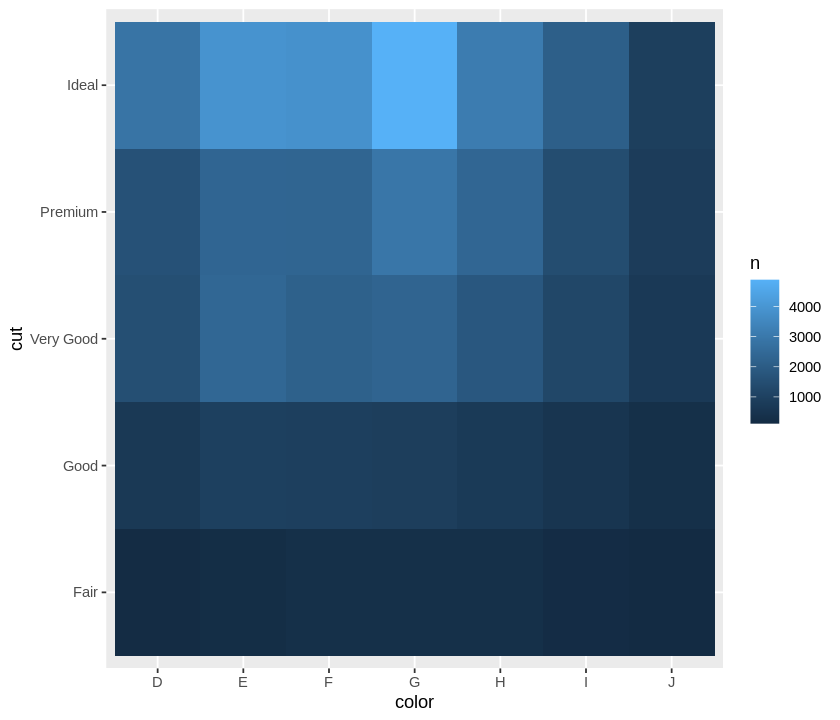

In [48]:
diamonds %>% 
  count(color, cut) %>%  
  ggplot(mapping = aes(x = color, y = cut)) +
    geom_tile(mapping = aes(fill = n)) 

In [ ]:
install.packages("viridis")
library(viridis)

In [ ]:
# pro tip: using the viridis package,
# recreate the tile plot with a better color gradient
diamonds %>% 
  count(color, cut) %>%  
  ggplot(mapping = aes(x = color, y = cut)) +
    geom_tile(mapping = aes(fill = n)) + 
    scale_fill_viridis()

## 3.3 Two Continuous variables

* `geom_point()`- makes it easy to see relationships
*  Gets harder to see a trend with more data
*  But there are workarounds

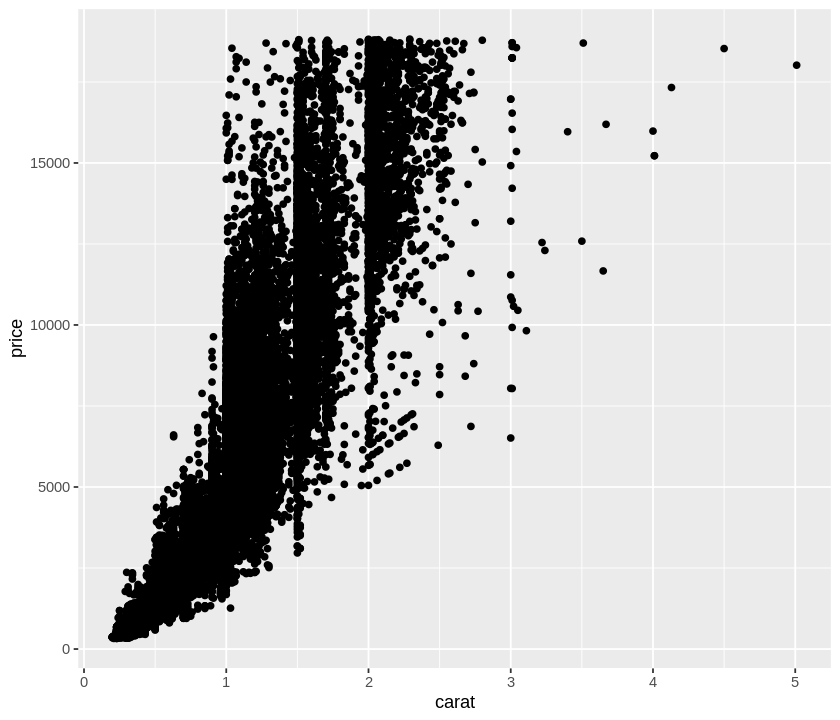

In [50]:
ggplot(data = diamonds) +
  geom_point(mapping = aes(x = carat, y = price))
  # this is overplotted and looks bad

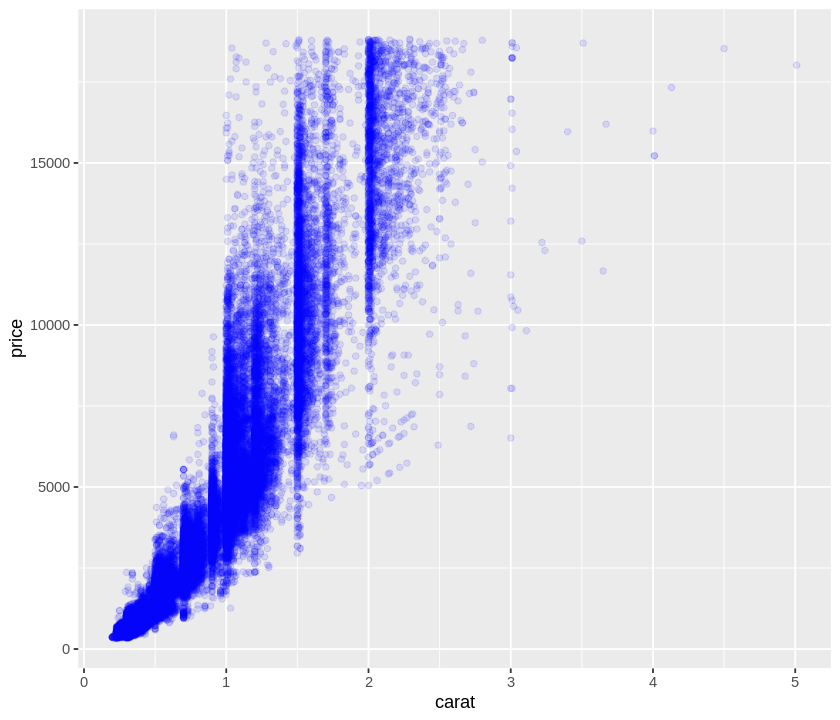

In [53]:
#Changing the transparency using alpha
ggplot(data = diamonds) + 
  geom_point(mapping = aes(x = carat, y = price), color="blue", alpha = .1)

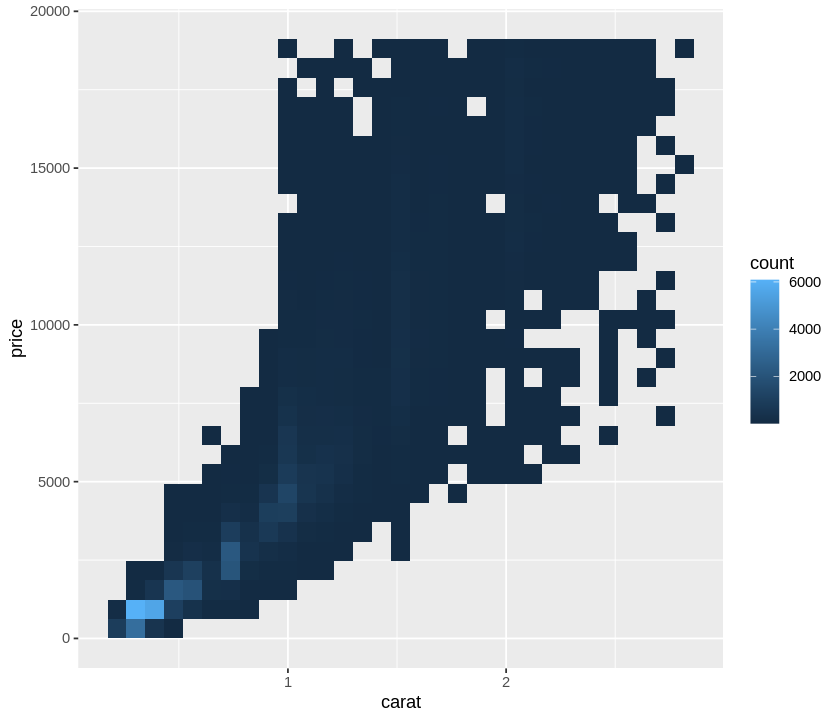

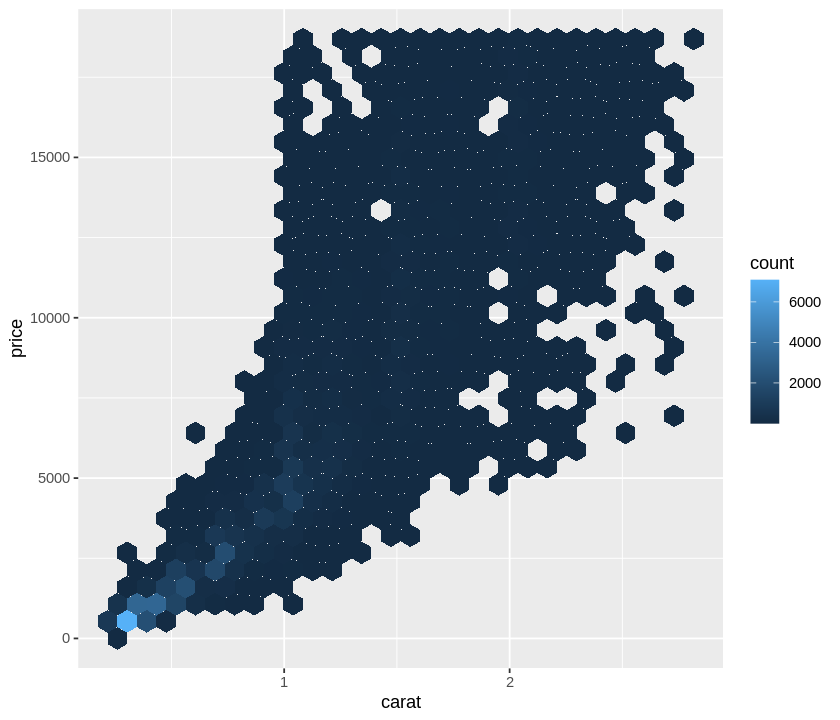

In [56]:
# try binning the data
ggplot(data = smaller) +
  geom_bin2d(mapping = aes(x = carat, y = price))

# install.packages("hexbin")
ggplot(data = smaller) +
  geom_hex(mapping = aes(x = carat, y = price))

# same observatoon a

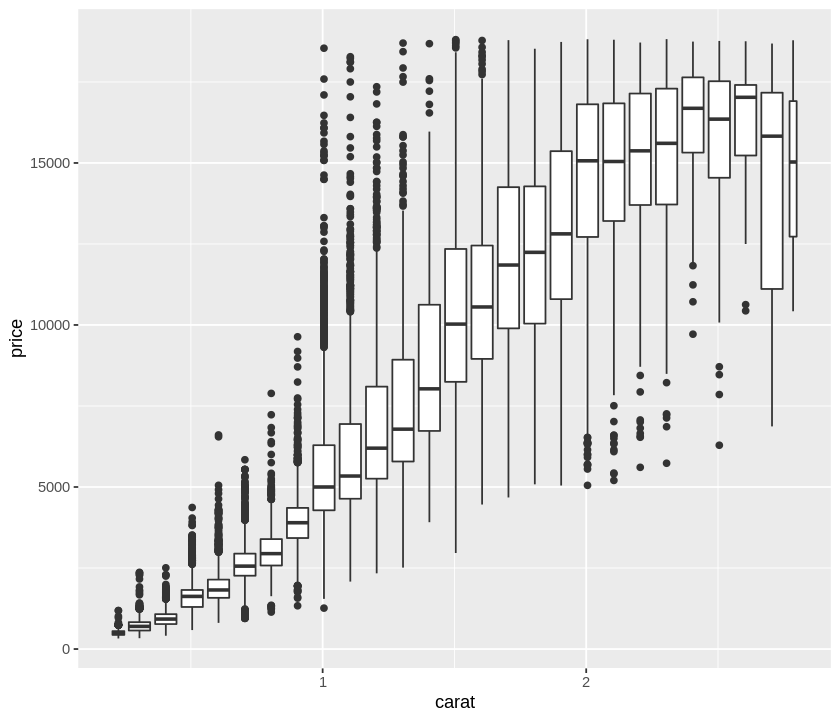

In [57]:
# discretize one of the variables
# using the cut_width function
# each category has the same "width"
ggplot(data = smaller, mapping = aes(x = carat, y = price)) + 
  geom_boxplot(mapping = aes(group = cut_width(carat, 0.1)))

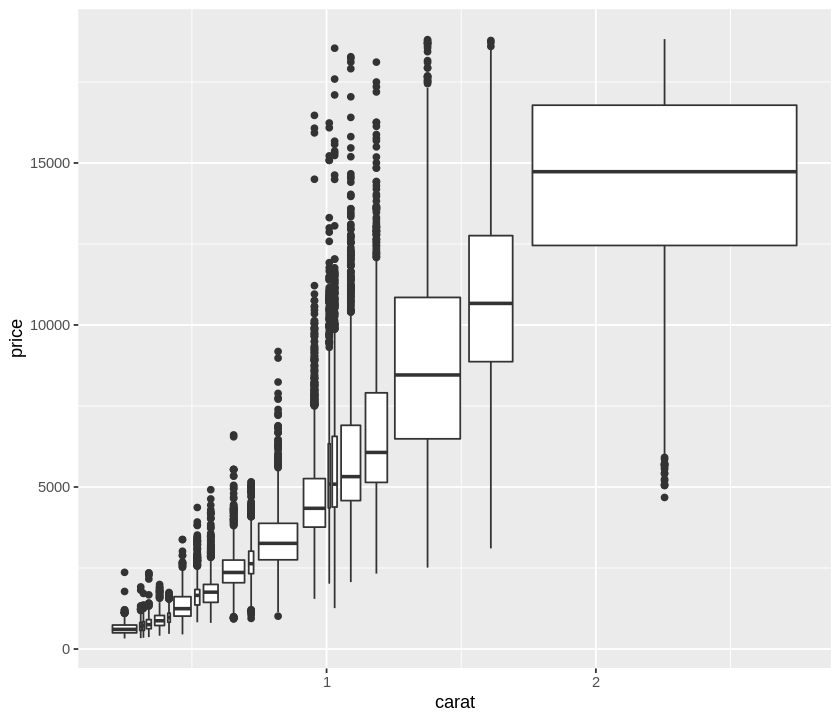

In [58]:
# discretize one of the variables
# here, each category has the same count
ggplot(data = smaller, mapping = aes(x = carat, y = price)) + 
  geom_boxplot(mapping = aes(group = cut_number(carat, 20)))

**Exercise**


How could we determine which variable in the Diamonds data set is most important in predicting the price of the diamond?